## Описание проекта

К нам обратился магазин строительных материалов «Строили, строили и наконец построили».Следует провести анализ программы лояльности, который  позволит магазину сделать клиентов счастливее и укрепить позиции на рынке торговли стройматериалами. Также необходимо произвести масштабное исследование по оценке эффективности торговых точек.
### Задачи проекта:
* Провести анализ данных и показать общую картину по проекту
* Получить основные ритейл_метрики в зависимости от принадлежности к определенной группе 
* Оценить работоспособность программы лояльности
* Предложить варианты повышения эффективности программы
* Проверить гипотезы


### Описание данных:

Датасет содержит данные о покупках в магазине строительных материалов. Все покупатели могут получить доступ в магазин с использованием персональных карт. За 200 рублей в месяц они могут стать участниками программы лояльности. В программу включены скидки, специальные предложения, подарки.

Файл retail_dataset.csv:

- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности;

Файл product_codes.csv:

- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара;


### **Данные**:

[product_codes.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/0a18bdf5-0562-4bfa-890e-39387f9361e3/product_codes.csv)

[retail_dataset.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/46f0de86-ec6c-43fc-b331-3816cff1c673/retail_dataset.csv)


###  **Предобработка данных**:

* Загрузим и изучим датасеты
* Найдем и изучим пропущенные значения в столбцах, заполним если есть необходимость отсутствующие значения
* Расммотрим типы данных в каждом столбце, приведем по необходимости в нужный формат
* Проверим на дубликаты
* Обратим внимание на аномалии и выбивающиеся значения

### Проведем исследовательский анализ данных:

* Проведем общий анализ показателей строительного магазина
* Проверим динамику роста выручки и кол-ва покупок в зависимости от принадлежности к группе с картой и без
* Проверим разницу продуктовой корзины (кол-во товаров в чеке) в зависимости от группы
* Проверим разницу в среднем чеке в зависимости от принадлежности к группе
* Оценим эффективность торговых точек
* Сделаем выводы 

### Проведем проверку эффективности программы лояльности

* Проведем сравнение клиентов с картой лояльности и без по:
  - Средняя прибыль с одного клиента
  - Количество продаж с одного клиента
  - Динамика продаж и прибыли по месяцам в обеих группах
  - Пользовательская активность

### Проверим гипотезы:

 * Средний чек участников программы лояльности и у остальных покупателей равны.
 * Кол-во товаров в чеке участников программы лояльности и у остальных покупателей равны.
 
### Общий вывод:

* Опишем полученные результаты и зафиксируем основной вывод проведённого исследования.
* Предложим варианты повышения эффективности на основании проведенного исследования


### Составим дашборд:

1. Построим гистограмму, отображающую количество покупок на покупателей.
2. Построим диаграмму, отображающую соотношение количества покупок по различным магазинам.
3. Добавим фильтр дашборда по дате совершения покупки.

По итогам исследования подготовим презентацию в формате **pdf,** .

## Загрузка и предоработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats as st
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
from scipy import stats as st

In [2]:
try:
    retail = pd.read_csv('retail_dataset.csv')
    products = pd.read_csv('product_codes.csv')
except:
    retail = pd.read_csv('/datasets/retail_dataset.csv')
    products = pd.read_csv('/datasets/product_codes.csv')
display(retail.head())
products.head()

purchaseid item_ID  Quantity         purchasedate  CustomerID  ShopID  \
0  538280     21873   11        2016-12-10 12:50:00  18427.0     Shop 0   
1  538862     22195   0         2016-12-14 14:11:00  22389.0     Shop 0   
2  538855     21239   7         2016-12-14 13:50:00  22182.0     Shop 0   
3  543543     22271   0         2017-02-09 15:33:00  23522.0     Shop 0   
4  543812     79321   0         2017-02-13 14:40:00  23151.0     Shop 0   

   loyalty_program  
0  0.0              
1  1.0              
2  1.0              
3  1.0              
4  1.0

productID  price_per_one
0  85123A    2.55         
1  71053     3.39         
2  84406B    2.75         
3  84029G    3.39         
4  84029E    3.39

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


У нас 7 столбцов и 105335 записи. Пропущены значения в столбце customer_id. Изучим данные более подробно.

In [4]:
first_len = len(retail)

In [5]:
retail.duplicated().sum() # обнаружены явные дубликаты, удаляем

1033

In [6]:
retail.drop_duplicates(inplace = True)
retail.duplicated().sum()

0

In [7]:
#меняем тип данных
#retail['loyalty_program'] = retail['loyalty_program'].astype(int)


In [8]:
def name(loyalty):
    if loyalty == 0 :
        return  'без карты'
    if loyalty == 1:
        return 'с картой'
    
retail['loyalty_program'] = retail['loyalty_program'].apply(name) # переименовываем месяца для наглядности в графиках
retail['loyalty_program'].head()  


0    без карты
1    с картой 
2    с картой 
3    с картой 
4    с картой 
Name: loyalty_program, dtype: object

In [9]:
#меняем тип данных
retail['purchasedate'] = pd.to_datetime(retail['purchasedate'])


In [10]:
retail.columns = retail.columns.str.lower() # приводим в порядок наименования столбцов

retail = retail.rename(columns = {'purchaseid':'purchase_id', 'purchasedate':'purchase_date', \
                       'customerid':'customer_id', 'shopid':'shop_id'})
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      104302 non-null  object        
 1   item_id          104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchase_date    104302 non-null  datetime64[ns]
 4   customer_id      68154 non-null   float64       
 5   shop_id          104302 non-null  object        
 6   loyalty_program  104302 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 6.4+ MB


In [11]:
retail.describe()

quantity   customer_id
count  104302.000000  68154.000000
mean   7.883003       21011.165889
std    329.565540     1766.665163 
min   -74216.000000   18025.000000
25%    0.000000       19533.000000
50%    2.000000       20977.000000
75%    7.000000       22633.000000
max    74214.000000   23962.000000

In [12]:
retail['quantity'].describe()

count    104302.000000
mean     7.883003     
std      329.565540   
min     -74216.000000 
25%      0.000000     
50%      2.000000     
75%      7.000000     
max      74214.000000 
Name: quantity, dtype: float64

In [13]:
#retail['quantity'].unique()

In [14]:
retail.loc[retail['quantity']< 0, 'quantity'].count()

2076

обнаружено 2076 отрицательных значений

Довольно странные у нас  значения в столбце с кол-вом товара. Пока трогать не будем, посмотрим дальше

In [15]:
retail[retail['quantity'] == 0].head()

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
1  538862      22195   0        2016-12-14 14:11:00  22389.0      Shop 0   
3  543543      22271   0        2017-02-09 15:33:00  23522.0      Shop 0   
4  543812      79321   0        2017-02-13 14:40:00  23151.0      Shop 0   
5  538379      22965   0        2016-12-12 11:26:00  22805.0      Shop 0   
6  540468      22189   0        2017-01-07 13:55:00 NaN           Shop 0   

  loyalty_program  
1  с картой        
3  с картой        
4  с картой        
5  с картой        
6  без карты

In [16]:
len(retail.loc[(retail['quantity'] == 0) & (retail['loyalty_program'] == 0)])

0

In [17]:
len(retail.loc[(retail['quantity'] == 0) & (retail['loyalty_program'] == 1)])

0

кол-во товара равное 0 прослеживается в обеих программах, пока оставляем

In [18]:
retail['loyalty_program'].unique()

array(['без карты', 'с картой'], dtype=object)

In [19]:
retail['shop_id'].unique()

array(['Shop 0', 'Shop 1', 'Shop 4', 'Shop 6', 'Shop 2', 'Shop 11',
       'Shop 3', 'Shop 5', 'Shop 7', 'Shop 12', 'Shop 8', 'Shop 27',
       'Shop 10', 'Shop 20', 'Shop 19', 'Shop 25', 'Shop 14', 'Shop 21',
       'Shop 18', 'Shop 9', 'Shop 16', 'Shop 28', 'Shop 29', 'Shop 17',
       'Shop 22', 'Shop 13', 'Shop 26', 'Shop 24', 'Shop 15', 'Shop 23',
       'Shop 30'], dtype=object)

В нашем датасете 31 магазин

In [20]:
retail['shop_id'].value_counts()

Shop 0     96370
Shop 4     1739 
Shop 1     1540 
Shop 6     1030 
Shop 8     560  
Shop 3     492  
Shop 7     312  
Shop 10    299  
Shop 12    278  
Shop 18    255  
Shop 2     252  
Shop 5     179  
Shop 11    169  
Shop 14    154  
Shop 19    74   
Shop 9     61   
Shop 15    60   
Shop 16    59   
Shop 26    56   
Shop 25    53   
Shop 27    45   
Shop 17    40   
Shop 22    40   
Shop 13    35   
Shop 24    32   
Shop 21    32   
Shop 28    30   
Shop 20    30   
Shop 30    15   
Shop 29    9    
Shop 23    2    
Name: shop_id, dtype: int64

shop 0 лидер по кол-ву упоминаний в таблице, причем с существенным отрывом от остальных магазинов, обратим внимание на данный момент. Может это какая_то оптовая база..

In [21]:
retail['date'] = retail['purchase_date'].dt.date
retail.head()

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
0  538280      21873   11       2016-12-10 12:50:00  18427.0      Shop 0   
1  538862      22195   0        2016-12-14 14:11:00  22389.0      Shop 0   
2  538855      21239   7        2016-12-14 13:50:00  22182.0      Shop 0   
3  543543      22271   0        2017-02-09 15:33:00  23522.0      Shop 0   
4  543812      79321   0        2017-02-13 14:40:00  23151.0      Shop 0   

  loyalty_program        date  
0  без карты       2016-12-10  
1  с картой        2016-12-14  
2  с картой        2016-12-14  
3  с картой        2017-02-09  
4  с картой        2017-02-13

In [22]:
display(retail['date'].min())
retail['date'].max()

datetime.date(2016, 12, 1)

datetime.date(2017, 2, 28)

Видим, что у нас данные по продажам с 1 декабря 2016 по 28 февраля 2017 года

In [23]:
retail['customer_id'].unique()

array([18427., 22389., 22182., ..., 20156., 20358., 23763.])

In [24]:
retail['customer_id'].value_counts()

18427.0    774
23520.0    751
20285.0    745
20990.0    715
20590.0    549
          ... 
23399.0    1  
23956.0    1  
21827.0    1  
23067.0    1  
18182.0    1  
Name: customer_id, Length: 1749, dtype: int64

In [25]:
# учитывая что отсутствующих значений слишком много поставим на них заглушку
display(retail['customer_id'].isna().sum())


36148

In [26]:
retail[retail['customer_id'].isna()] = retail[retail['customer_id'].isna()]\
.fillna(999)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      104302 non-null  object        
 1   item_id          104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchase_date    104302 non-null  datetime64[ns]
 4   customer_id      104302 non-null  float64       
 5   shop_id          104302 non-null  object        
 6   loyalty_program  104302 non-null  object        
 7   date             104302 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 7.2+ MB


In [27]:
retail['purchase_id'].value_counts()

537434     675
538071     651
538349     613
537638     601
537237     597
          ... 
C541418    1  
C537416    1  
544333     1  
537664     1  
539645     1  
Name: purchase_id, Length: 4894, dtype: int64

In [28]:
retail.quantity = pd.to_numeric(retail.quantity)

In [29]:
# считаем потери в данных
len(retail)/first_len

0.9901931931456781

In [30]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


In [31]:
products = products.rename(columns ={'productID': 'item_id'})
display(products.duplicated().sum()) # явные дубликаты не обнаружены



0

In [32]:
products['item_id'].value_counts()

DOT       174
M         59 
S         29 
POST      15 
D         13 
          .. 
72803b    1  
10124A    1  
84597B    1  
22050     1  
21370     1  
Name: item_id, Length: 3159, dtype: int64

In [33]:
products[products['item_id'] == 'DOT']

item_id  price_per_one
1203  DOT     569.77       
1866  DOT     607.49       
2430  DOT     254.43       
2458  DOT     121.06       
2507  DOT     498.47       
...   ...        ...       
9882  DOT     79.67        
9883  DOT     137.96       
9893  DOT     147.49       
9927  DOT     265.19       
9967  DOT     172.62       

[174 rows x 2 columns]

 мы видим, что одному продукту соответствует несколько цен за единицу товара. Возможно тут учитываются скидки, уценка и т.д....данный момент нам помешает при объединении таблиц, поэтому заменим на медиану

In [34]:
products = products.groupby('item_id')['price_per_one'].median().reset_index()
products[products['item_id'] == 'DOT'] # проверяем замену..порядок )

item_id  price_per_one
3150  DOT     198.19

In [35]:
products['price_per_one'].value_counts()

1.250     104
2.460     100
1.630     92 
0.850     88 
0.420     75 
          .. 
1.655     1  
7.785     1  
5.550     1  
19.960    1  
0.705     1  
Name: price_per_one, Length: 516, dtype: int64

In [36]:
data = retail.merge(products, on = 'item_id', how = 'left') # Объединяем таблицы
data.head(10)

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
0  538280      21873   11       2016-12-10 12:50:00  18427.0      Shop 0   
1  538862      22195   0        2016-12-14 14:11:00  22389.0      Shop 0   
2  538855      21239   7        2016-12-14 13:50:00  22182.0      Shop 0   
3  543543      22271   0        2017-02-09 15:33:00  23522.0      Shop 0   
4  543812      79321   0        2017-02-13 14:40:00  23151.0      Shop 0   
5  538379      22965   0        2016-12-12 11:26:00  22805.0      Shop 0   
6  540468      22189   0        2017-01-07 13:55:00  999.0        Shop 0   
7  541424      79321   1        2017-01-17 17:57:00  999.0        Shop 0   
8  538883      22891   0        2016-12-14 15:56:00  999.0        Shop 0   
9  539501      22372   0        2016-12-20 11:08:00  22764.0      Shop 0   

  loyalty_program        date  price_per_one  
0  без карты       2016-12-10  1.630          
1  с картой        2016-12-14  3.290          
2  с картой        2016-12-14  1.630          
3  с картой        2017-02-09  4.370          
4  с картой        2017-02-13  5.750          
5  с картой        2016-12-12  3.115          
6  без карты       2017-01-07  3.950          
7  без карты       2017-01-17  5.750          
8  без карты       2016-12-14  6.270          
9  с картой        2016-12-20  4.230

In [37]:
# вспоминаем про наше аномальное высокое кол-во товаров
data[data['quantity'] == 74214]

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
68612  541431      23166   74214    2017-01-18 10:01:00  18025.0      Shop 0   

      loyalty_program        date  price_per_one  
68612  без карты       2017-01-18  1.04

In [38]:
data[data['customer_id'] == 18025]

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
49166  C541433     23166  -74216    2017-01-18 10:17:00  18025.0      Shop 0   
68612  541431      23166   74214    2017-01-18 10:01:00  18025.0      Shop 0   

      loyalty_program        date  price_per_one  
49166  без карты       2017-01-18  1.04           
68612  без карты       2017-01-18  1.04

In [39]:
# По этому заказу сразу же идет возврат, удаляю данного клиента, дабы не вводить смуту в исследование
data = data.query('customer_id != 18025')


In [40]:
data['sum'] = data['quantity'] * data['price_per_one'] # создаем столбец с общей ценой

In [41]:
data.head()

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
0  538280      21873   11       2016-12-10 12:50:00  18427.0      Shop 0   
1  538862      22195   0        2016-12-14 14:11:00  22389.0      Shop 0   
2  538855      21239   7        2016-12-14 13:50:00  22182.0      Shop 0   
3  543543      22271   0        2017-02-09 15:33:00  23522.0      Shop 0   
4  543812      79321   0        2017-02-13 14:40:00  23151.0      Shop 0   

  loyalty_program        date  price_per_one    sum  
0  без карты       2016-12-10  1.63           17.93  
1  с картой        2016-12-14  3.29           0.00   
2  с картой        2016-12-14  1.63           11.41  
3  с картой        2017-02-09  4.37           0.00   
4  с картой        2017-02-13  5.75           0.00

In [42]:
data['quantity'].describe()

count    104300.000000
mean     7.883174     
std      54.760118    
min     -9361.000000  
25%      0.000000     
50%      2.000000     
75%      7.000000     
max      5567.000000  
Name: quantity, dtype: float64

<AxesSubplot:>

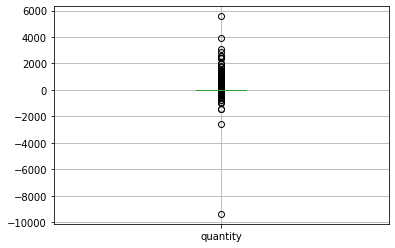

In [43]:
data.boxplot('quantity')

In [44]:
data_perc_cnt = int(np.percentile(data['quantity'], [99]))
data_perc_cnt

99

Только 1 % кол-ва товаров выше 119 удаляем эти данные

In [45]:
data = data.query('quantity <@data_perc_cnt')


In [46]:
len(data[data['quantity'] == 0])

32362

 Очень большое кол-во нулевых значений в кол-ве товара. Они нам все равно дадут 0 в суммах и будут неинформативными, поэтому удаляем их из датасета 

In [47]:
data = data.query('quantity != 0')
data

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
0       538280      21873   11       2016-12-10 12:50:00  18427.0      Shop 0   
2       538855      21239   7        2016-12-14 13:50:00  22182.0      Shop 0   
7       541424      79321   1        2017-01-17 17:57:00  999.0        Shop 0   
10      537795      82494L  5        2016-12-08 13:03:00  22892.0      Shop 0   
11      541696      22197   4        2017-01-20 18:08:00  999.0        Shop 0   
...        ...        ...  ..                        ...    ...           ...   
104296  540154      22134   3        2017-01-05 11:30:00  999.0        Shop 0   
104297  538566      21826   1        2016-12-13 11:21:00  999.0        Shop 0   
104299  538068      85048   1        2016-12-09 14:05:00  23657.0      Shop 0   
104300  538207      22818   11       2016-12-10 11:33:00  18427.0      Shop 0   
104301  543977      22384   9        2017-02-14 15:35:00  21294.0      Shop 0   

       loyalty_program        date  price_per_one     sum  
0       без карты       2016-12-10  1.630          17.930  
2       с картой        2016-12-14  1.630          11.410  
7       без карты       2017-01-17  5.750          5.750   
10      с картой        2016-12-08  5.205          26.025  
11      без карты       2017-01-20  1.240          4.960   
...           ...              ...    ...            ...   
104296  без карты       2017-01-05  0.630          1.890   
104297  без карты       2016-12-13  2.460          2.460   
104299  с картой        2016-12-09  8.330          8.330   
104300  без карты       2016-12-10  0.830          9.130   
104301  без карты       2017-02-14  4.130          37.170  

[70822 rows x 10 columns]

<font color='purple'><b></b></font><br>

In [48]:
len(data[data['quantity'] < 0])

2075

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70822 entries, 0 to 104301
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchase_id      70822 non-null  object        
 1   item_id          70822 non-null  object        
 2   quantity         70822 non-null  int64         
 3   purchase_date    70822 non-null  datetime64[ns]
 4   customer_id      70822 non-null  float64       
 5   shop_id          70822 non-null  object        
 6   loyalty_program  70822 non-null  object        
 7   date             70822 non-null  object        
 8   price_per_one    70822 non-null  float64       
 9   sum              70822 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 5.9+ MB


In [50]:
data[data['quantity'] < 0].head()

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
64   C539944     22776  -2        2016-12-23 11:38:00  20239.0      Shop 0   
109  C542910     20726  -2        2017-02-01 15:38:00  23190.0      Shop 0   
112  C542426     22418  -25       2017-01-28 09:32:00  19825.0      Shop 0   
253  C539726     22791  -11       2016-12-21 14:24:00  22686.0      Shop 0   
344  C544034     21878  -2        2017-02-15 11:28:00  20380.0      Shop 0   

    loyalty_program        date  price_per_one     sum  
64   без карты       2016-12-23  14.955        -29.910  
109  с картой        2017-02-01  4.130         -8.260   
112  без карты       2017-01-28  1.645         -41.125  
253  с картой        2016-12-21  1.855         -20.405  
344  без карты       2017-02-15  1.240         -2.480

In [51]:
data[data['quantity'] < 0].groupby('purchase_id')['item_id']\
.nunique().sort_values(ascending = False)

purchase_id
C542426    35
C538350    26
C538341    23
C537860    21
C540417    21
           ..
C538314    1 
C538344    1 
C538357    1 
C538362    1 
C545189    1 
Name: item_id, Length: 1018, dtype: int64

Видим, что основная масса чеков с буквой C. Изучим более подробно связку товар-клиент. Может это нам, что-то даст

In [52]:
data.loc[(data['item_id'] == '20726') & (data['customer_id'] == 23190.0), :]

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
109  C542910     20726  -2        2017-02-01 15:38:00  23190.0      Shop 0   

    loyalty_program        date  price_per_one   sum  
109  с картой        2017-02-01  4.13          -8.26

In [53]:
data[(data['customer_id'] == 23190.0) & (data['quantity'] < 0)].head()

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
109   C542910     20726  -2        2017-02-01 15:38:00  23190.0      Shop 0   
660   C537602     22423  -3        2016-12-07 12:45:00  23190.0      Shop 0   
1600  C537602     22654  -2        2016-12-07 12:45:00  23190.0      Shop 0   
1998  C537602     85099B -2        2016-12-07 12:45:00  23190.0      Shop 0   
2112  C537602     22197  -2        2016-12-07 12:45:00  23190.0      Shop 0   

     loyalty_program        date  price_per_one     sum  
109   с картой        2017-02-01  4.130         -8.260   
660   с картой        2016-12-07  12.735        -38.205  
1600  с картой        2016-12-07  11.750        -23.500  
1998  с картой        2016-12-07  1.950         -3.900   
2112  с картой        2016-12-07  1.240         -2.480

In [54]:
data.loc[(data['item_id'] == '22418') & (data['customer_id'] == 19825.0), :]

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
112    C542426     22418  -25       2017-01-28 09:32:00  19825.0      Shop 0   
50637  539444      22418   23       2016-12-17 15:52:00  19825.0      Shop 0   

      loyalty_program        date  price_per_one     sum  
112    без карты       2017-01-28  1.645         -41.125  
50637  без карты       2016-12-17  1.645          37.835

In [55]:
data.loc[(data['item_id'] == '22791') & (data['customer_id'] == 22686.0), :]

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
253   C539726     22791  -11       2016-12-21 14:24:00  22686.0      Shop 0   
2963  539417      22791   11       2016-12-17 13:57:00  22686.0      Shop 0   

     loyalty_program        date  price_per_one     sum  
253   с картой        2016-12-21  1.855         -20.405  
2963  с картой        2016-12-17  1.855          20.405

In [56]:
data[data['customer_id'] == 22686.0].head()

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
253    C539726     22791  -11       2016-12-21 14:24:00  22686.0      Shop 0   
529    539417      21143   11       2016-12-17 13:57:00  22686.0      Shop 0   
2963   539417      22791   11       2016-12-17 13:57:00  22686.0      Shop 0   
10498  539418      21245   7        2016-12-17 13:58:00  22686.0      Shop 0   
14534  539418      84032B  5        2016-12-17 13:58:00  22686.0      Shop 0   

      loyalty_program        date  price_per_one     sum  
253    с картой        2016-12-21  1.855         -20.405  
529    с картой        2016-12-17  4.130          45.430  
2963   с картой        2016-12-17  1.855          20.405  
10498  с картой        2016-12-17  2.490          17.430  
14534  с картой        2016-12-17  3.290          16.450

Мы можем сделать выводы, что практически все отрицательные кол-ва заказов в таблице сопровождаются чеком с буквой С, это нам дает понимание, что это не просто механический сбой в программе, а какой то алгоритм заложенных действий. У некоторых клиентов прослеживается в приобретенных товарах item_id  кол-во товаров положительное а потом те же самые товары позже в отрицательном кол-ве. У некоторых клиентов есть отрицательные значения, которые не прослеживаются в покупках. Возможно это возвраты, а те товары которые идут без покупки, были сделаны ранее срока нашего исследования. Утверждать данное мы конечно не можем, но предположительно думаю, что это так. Изучим их подробнее ниже. Не будем удалять на этом шаге 

In [57]:
data['price_per_one'].describe()

count    70822.000000
mean     4.951454    
std      79.855976   
min      0.000000    
25%      1.630000    
50%      2.890000    
75%      4.650000    
max      6706.710000 
Name: price_per_one, dtype: float64

In [58]:
display(len(data[data['price_per_one'] == 0]))
data[data['price_per_one'] == 0].head(10)

49

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
8574   542570      85028S -2        2017-01-28 14:53:00  999.0        Shop 0   
9642   542581      90091  -2        2017-01-28 14:58:00  999.0        Shop 0   
9692   540987      17011A -62       2017-01-12 16:15:00  999.0        Shop 0   
10683  543257      84611B -1431     2017-02-04 16:06:00  999.0        Shop 0   
12691  542576      85179B -2        2017-01-28 14:56:00  999.0        Shop 0   
15838  542414      84967A -3        2017-01-27 17:15:00  999.0        Shop 0   
16385  542418      84966A -18       2017-01-27 17:39:00  999.0        Shop 0   
19649  543267      35645   2        2017-02-04 17:24:00  999.0        Shop 0   
20661  542579      90000C -2        2017-01-28 14:57:00  999.0        Shop 0   
23039  542391      84455  -32       2017-01-27 14:54:00  999.0        Shop 0   

      loyalty_program        date  price_per_one  sum  
8574   без карты       2017-01-28  0.0           -0.0  
9642   без карты       2017-01-28  0.0           -0.0  
9692   без карты       2017-01-12  0.0           -0.0  
10683  без карты       2017-02-04  0.0           -0.0  
12691  без карты       2017-01-28  0.0           -0.0  
15838  без карты       2017-01-27  0.0           -0.0  
16385  без карты       2017-01-27  0.0           -0.0  
19649  без карты       2017-02-04  0.0            0.0  
20661  без карты       2017-01-28  0.0           -0.0  
23039  без карты       2017-01-27  0.0           -0.0

Нулевая цена и customer_id с заглушкой при кол-ве строк 49, несущественная потеря удаляем эти данные из датафрейма 

In [59]:
data = data.query('price_per_one != 0')
data['price_per_one'].describe()

count    70773.000000
mean     4.954882    
std      79.883509   
min      0.095000    
25%      1.630000    
50%      2.890000    
75%      4.650000    
max      6706.710000 
Name: price_per_one, dtype: float64

посчитаем перцентили

In [60]:
#data.np_percentile['pri']
data_perc_price = int(np.percentile(data['price_per_one'], [99]))
data_perc_price

15

Только 1% price_per_one выше 15. И мы удаляем из таблицы все, что выше этой цены

In [61]:
data = data.query('price_per_one < @data_perc_price')
data.head()

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
0   538280      21873   11       2016-12-10 12:50:00  18427.0      Shop 0   
2   538855      21239   7        2016-12-14 13:50:00  22182.0      Shop 0   
7   541424      79321   1        2017-01-17 17:57:00  999.0        Shop 0   
10  537795      82494L  5        2016-12-08 13:03:00  22892.0      Shop 0   
11  541696      22197   4        2017-01-20 18:08:00  999.0        Shop 0   

   loyalty_program        date  price_per_one     sum  
0   без карты       2016-12-10  1.630          17.930  
2   с картой        2016-12-14  1.630          11.410  
7   без карты       2017-01-17  5.750          5.750   
10  с картой        2016-12-08  5.205          26.025  
11  без карты       2017-01-20  1.240          4.960

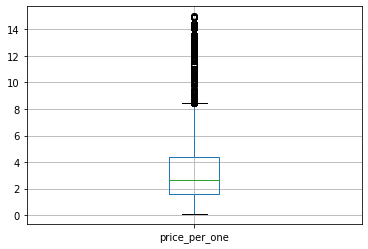

In [62]:
data.boxplot('price_per_one');

In [63]:
len(data)/first_len

0.6627521716428537

Потеря данных в 34 процента_это очень много, на мой взгляд. Но с другой стороны, данные которые мы убрали не давали нам информацию

###  результаты предоработки:


* поставили заглушку в пропущенные значения  customer_id 
* привели в соответствующий тип столбец с датой и временем, создали столбец только с датой
* привели в соотвествующий тип столбец loyalty_program
* проверили наличие дубликатов и удалили их там, где они были
* объединили таблицы retail и products, для дальнейшего исследования
* создали столбец с общей суммой покупок
* удалили аномалии в столбце price_per_one
* частично удалили аномалии в столбце quantity (отрицательные значения оставили для дальнейшего исследования)

## Исследовательский анализ 

* Определим аномалии в показателях
* Рассмотрим общие продажи
* Изучим нулевые показатели в кол-ве товара
* Посмотрим кол-во покупок в таблице
* Найдем средний чек на покупку


### Рассмотрим общее кол-во покупок

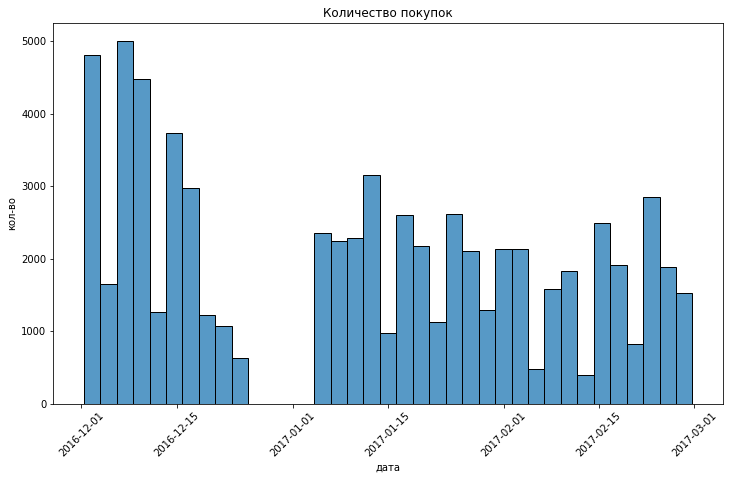

In [64]:

plt.figure(figsize = (12,7))
ax = sns.histplot(data['purchase_date'])
plt.xticks(rotation = 45)
plt.xlabel('дата')
plt.ylabel('кол-во')
plt.title('Количество покупок');


Мы видим, что общее кол-во покупок достаточно высокое в декабре. Ближе к НГ продаж нет вообще, скорее всего магазин не работал. В январе и феврале кол-во продаж существенно не отличается. Чтобы посмотреть более детально, создадим столбец с месяцами 

In [65]:
data['month'] = data['purchase_date'].dt.month # создадим столбец с месяцами
#data['week'] = data['purchase_date'].dt.week
data.head()

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
0   538280      21873   11       2016-12-10 12:50:00  18427.0      Shop 0   
2   538855      21239   7        2016-12-14 13:50:00  22182.0      Shop 0   
7   541424      79321   1        2017-01-17 17:57:00  999.0        Shop 0   
10  537795      82494L  5        2016-12-08 13:03:00  22892.0      Shop 0   
11  541696      22197   4        2017-01-20 18:08:00  999.0        Shop 0   

   loyalty_program        date  price_per_one     sum  month  
0   без карты       2016-12-10  1.630          17.930  12     
2   с картой        2016-12-14  1.630          11.410  12     
7   без карты       2017-01-17  5.750          5.750   1      
10  с картой        2016-12-08  5.205          26.025  12     
11  без карты       2017-01-20  1.240          4.960   1

In [66]:
def name(month):
    if month == 12:
        return  'декабрь'
    if month == 1:
        return 'январь'
    if month == 2:
        return 'февраль'
data['month'] = data['month'].apply(name) # переименовываем месяца для наглядности в графиках
    


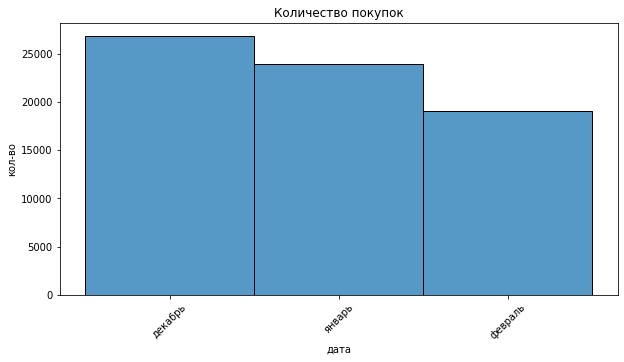

In [67]:
plt.figure(figsize = (10,5))
ax = sns.histplot(data['month'])
plt.xticks(rotation = 45)
plt.xlabel('дата')
plt.ylabel('кол-во')
plt.title('Количество покупок');


Общий показатель продаж падает весь период исследования.

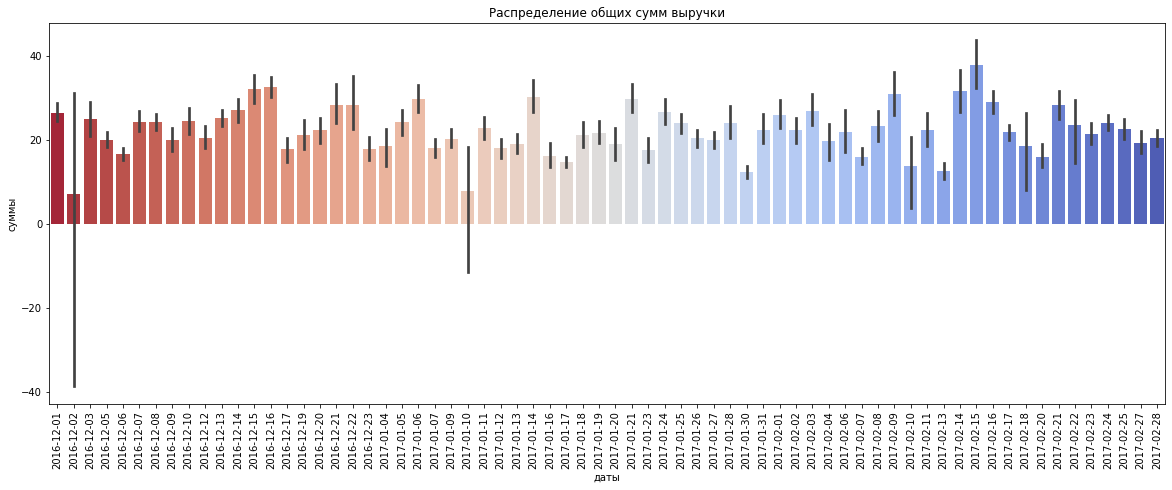

In [68]:
# посмотрим как распределены продажи по времени
plt.subplots(figsize=(20, 7))
ax = sns.barplot(x = 'date', y = 'sum', data = data.sort_values(by = 'date'), palette = 'coolwarm_r')
ax.set_title('Распределение общих сумм выручки')
ax.set_xlabel('даты')
ax.set_ylabel('суммы');
plt.xticks(rotation=90)
plt.show()

Видим как влияют на результаты отрицательные значения, рассмотрим их поближе

In [69]:
dt = data[data['quantity']< 0]
dt.head()

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
64   C539944     22776  -2        2016-12-23 11:38:00  20239.0      Shop 0   
109  C542910     20726  -2        2017-02-01 15:38:00  23190.0      Shop 0   
112  C542426     22418  -25       2017-01-28 09:32:00  19825.0      Shop 0   
253  C539726     22791  -11       2016-12-21 14:24:00  22686.0      Shop 0   
344  C544034     21878  -2        2017-02-15 11:28:00  20380.0      Shop 0   

    loyalty_program        date  price_per_one     sum    month  
64   без карты       2016-12-23  14.955        -29.910  декабрь  
109  с картой        2017-02-01  4.130         -8.260   февраль  
112  без карты       2017-01-28  1.645         -41.125  январь   
253  с картой        2016-12-21  1.855         -20.405  декабрь  
344  без карты       2017-02-15  1.240         -2.480   февраль

In [70]:
dt.groupby('loyalty_program')['purchase_id'].count()

loyalty_program
без карты    1491
с картой     411 
Name: purchase_id, dtype: int64

Отрицательные значения есть и у клиентов с картой лояльности и у клиентов без нее

In [71]:
dt.groupby('purchase_id')['customer_id'].nunique().sort_values(ascending = False)

purchase_id
536589     1
C541897    1
C541693    1
C541694    1
C541701    1
          ..
C538595    1
C538628    1
C538632    1
C538642    1
C545189    1
Name: customer_id, Length: 907, dtype: int64

 Дополнительные исследования были проведены выше, в предоработке. я все же склоняюсь к тому, что это возвраты. В любом случае удалять эти данные не будем, чтобы видеть реальную картину происходящего изучим подробнее в следующем блоке

###  "Возвраты"

In [73]:
refund = data[data['sum']< 0]
display(len(refund))
refund.head()

1902

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
64   C539944     22776  -2        2016-12-23 11:38:00  20239.0      Shop 0   
109  C542910     20726  -2        2017-02-01 15:38:00  23190.0      Shop 0   
112  C542426     22418  -25       2017-01-28 09:32:00  19825.0      Shop 0   
253  C539726     22791  -11       2016-12-21 14:24:00  22686.0      Shop 0   
344  C544034     21878  -2        2017-02-15 11:28:00  20380.0      Shop 0   

    loyalty_program        date  price_per_one     sum    month  
64   без карты       2016-12-23  14.955        -29.910  декабрь  
109  с картой        2017-02-01  4.130         -8.260   февраль  
112  без карты       2017-01-28  1.645         -41.125  январь   
253  с картой        2016-12-21  1.855         -20.405  декабрь  
344  без карты       2017-02-15  1.240         -2.480   февраль

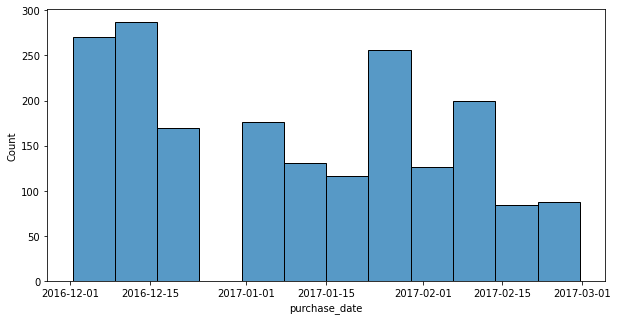

In [74]:
plt.figure(figsize = (10,5))
ax = sns.histplot(refund['purchase_date'])


Самые высокие возвраты в декабре, посмотрим по группам

In [75]:
rg = refund.groupby(['loyalty_program', 'month']).agg({'quantity': 'sum', 'sum': 'sum', })
rg = abs(rg)
rg.columns = ['quantity', 'sum']
rg.head()

quantity       sum
loyalty_program month                      
без карты       декабрь  18197     63104.75
                февраль  6547      25343.30
                январь   12542     39915.12
с картой        декабрь  2386      7556.33 
                февраль  807       3736.26

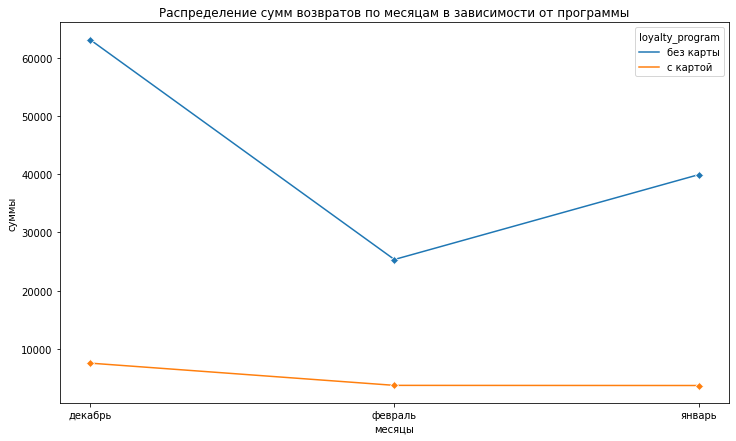

In [76]:
plt.figure(figsize = (12,7))
ax = sns.lineplot(x = 'month', y = 'sum', hue = 'loyalty_program', data = rg, marker = 'D' )
ax.set_title('Распределение сумм возвратов по месяцам в зависимости от программы')
ax.set_xlabel('месяцы')
ax.set_ylabel('суммы');

В группе c картой лояльности возвраты распределены ровно по месяцам и гораздо ниже, чем у группы без данной карты. У клиентов без карты очень высокие показатели по суммам возврата, наиболее низкий месяц по возврату февраль. Что не противоречит основным показателям

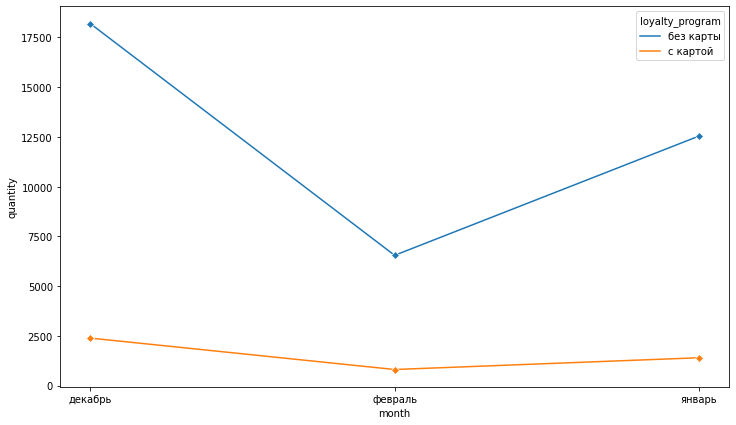

In [77]:
plt.figure(figsize = (12,7))
sns.lineplot(x = 'month', y = 'quantity', hue = 'loyalty_program', data = rg, marker = 'D')

ax.set_title('Распределение кол -ва возвращенных товаров по месяцам в зависимости от программы')
ax.set_xlabel('месяцы')
ax.set_ylabel('кол-во');

кол-во возвращенных товаров у группы с картой лояльности снова распределена равномерно по месяцам и  низкая (почти нулевая) по сравнению с группой без этой карты. Возвраты у группы без карты  самые низкие в феврале и очень высокие в январе. 

In [78]:
 # посмотрим сколько общих возвратов в каждой группе
refund.groupby('loyalty_program').agg({'quantity': 'sum', 'sum': 'sum'})

quantity        sum
loyalty_program                     
без карты       -37286    -128363.17
с картой        -4591     -15004.90

In [79]:
display('Всего кол-во возвратов :', abs(refund['quantity']).sum())
display('Всего сумма возвратов :', abs(refund['sum']).sum().round(2))
display('Cамый возвращаемый товар :', refund['item_id'].value_counts().head(1))
display('Распределение возвратов по магазинам :', refund['shop_id'].value_counts().head(1))
display('Процент возврата :', (abs(refund['sum'].sum()/data['sum'].sum())*100).round(2),'%')

'Всего кол-во возвратов :'

41877

'Всего сумма возвратов :'

143368.07

'Cамый возвращаемый товар :'

22423    55
Name: item_id, dtype: int64

'Распределение возвратов по магазинам :'

Shop 0    1630
Name: shop_id, dtype: int64

'Процент возврата :'

9.23

'%'

Отличился Shop 0, достаточно высокий процент возврата (может это дисконт центр...). Некий товар 22423 вернули аж 55 раз.

для дальнейшего исследования отрицательные данные будут нам мешать. Тем более некоторые "возвраты" идут отдельно от покупок. Поэтому удаляем их из таблицы

In [80]:
data = data.query('quantity > 0')
data.head()

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
0   538280      21873   11       2016-12-10 12:50:00  18427.0      Shop 0   
2   538855      21239   7        2016-12-14 13:50:00  22182.0      Shop 0   
7   541424      79321   1        2017-01-17 17:57:00  999.0        Shop 0   
10  537795      82494L  5        2016-12-08 13:03:00  22892.0      Shop 0   
11  541696      22197   4        2017-01-20 18:08:00  999.0        Shop 0   

   loyalty_program        date  price_per_one     sum    month  
0   без карты       2016-12-10  1.630          17.930  декабрь  
2   с картой        2016-12-14  1.630          11.410  декабрь  
7   без карты       2017-01-17  5.750          5.750   январь   
10  с картой        2016-12-08  5.205          26.025  декабрь  
11  без карты       2017-01-20  1.240          4.960   январь

### Рассмотрим распределение товаров по месяцам и изучим аномальные значения

'Только в 1 % чеков quantity превышает'

71

'Только в 1 % чеков sum превышает'

186

'Только в 1 % чеков price_per_one превышает'

14

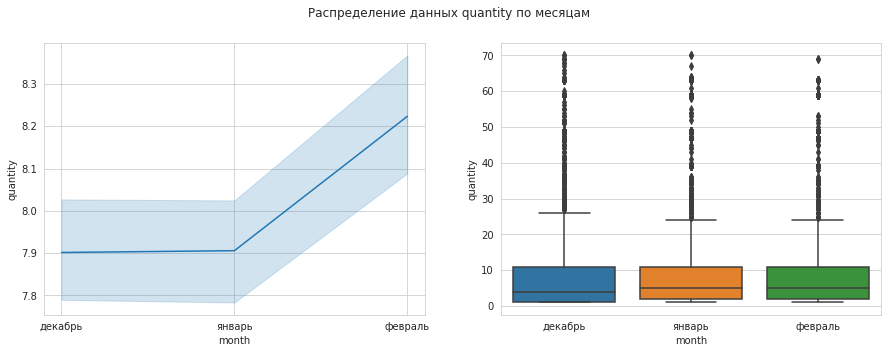

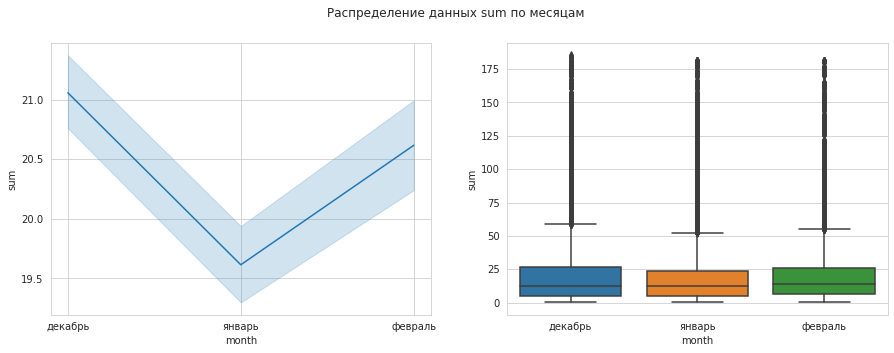

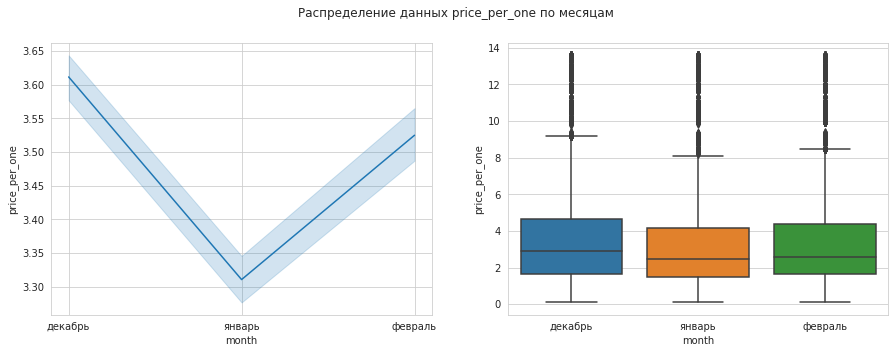

In [81]:
# по общим данным
for item in ['quantity', 'sum', 'price_per_one']:
    perc_item = int(np.percentile(data[item],[99]))
    display(f'Только в 1 % чеков {item} превышает', perc_item )
    data = data.loc[data[item]< perc_item]
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Распределение данных {item} по месяцам')
    sns.lineplot(data =data, x = 'month', y = item, ax=ax[0])
    sns.boxplot(data = data, x = 'month', y = item, ax=ax[1])

В январе все проседает, к февралю все растет. Кроме кол-ва приобретенных товаров. Оно растет с декабря по февраль

Показатель кол-ва проданных товаров по месяцам достаточно низкий с декабря по январь, к февралю этот параметр начинает расти. Суммы вырученные с продажи самые высокие в декабре. В январе данный показатель проседает и к февралю, также начинает выправляться. Тоже самое можно сказать по цене за единицу товара. Возможно в данном случае имеет место момент скидок на Новогодний ассортимент не распроданный в декабре. В целом мы видим, что январь - самый неудачный для продаж месяц. Самый удачный месяц декабрь в период нашего исследования 

### Рассмотрим кол-во  и сумму товаров в среднем чеке

In [82]:
df = data.groupby(['purchase_id', 'date', 'loyalty_program'])\
.agg({'quantity':'sum', 'sum':'sum', 'price_per_one'\
     :'median'}).reset_index()
#df_cnt.columns = ['purchase_id', 'date','loyalty_program','cnt']
df


purchase_id        date loyalty_program  quantity      sum  price_per_one
0     536365      2016-12-01  с картой        33        186.515  6.0200       
1     536366      2016-12-01  с картой        10        19.750   1.9750       
2     536367      2016-12-01  без карты       71        285.395  4.6000       
3     536368      2016-12-01  без карты       11        96.090   10.7900      
4     536369      2016-12-01  без карты       2         13.200   6.6000       
...      ...             ...        ...      ..            ...      ...       
3465  545214      2017-02-28  с картой        89        203.340  2.2700       
3466  545215      2017-02-28  без карты       237       591.025  1.9500       
3467  545216      2017-02-28  без карты       189       523.540  1.9025       
3468  545217      2017-02-28  без карты       189       479.605  2.1125       
3469  545218      2017-02-28  с картой        141       720.415  4.3100       

[3470 rows x 6 columns]

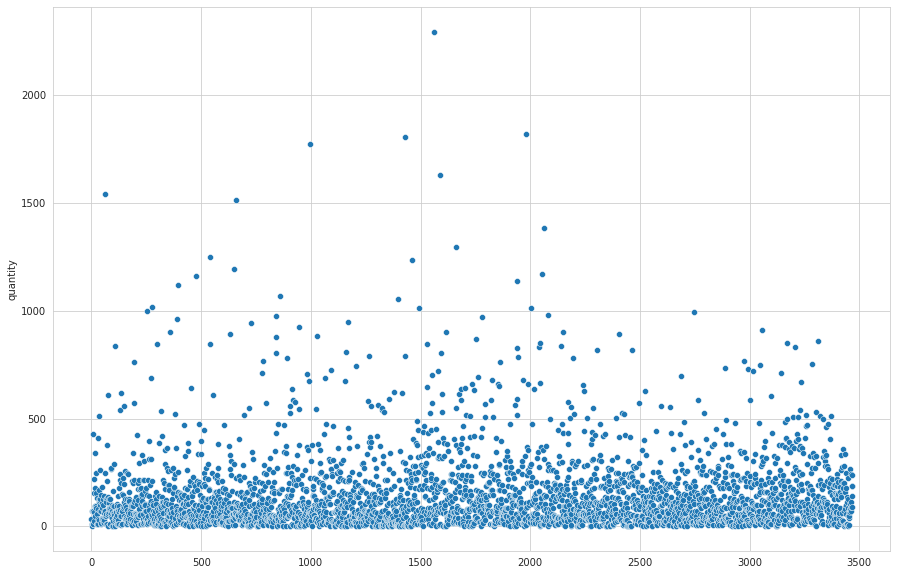

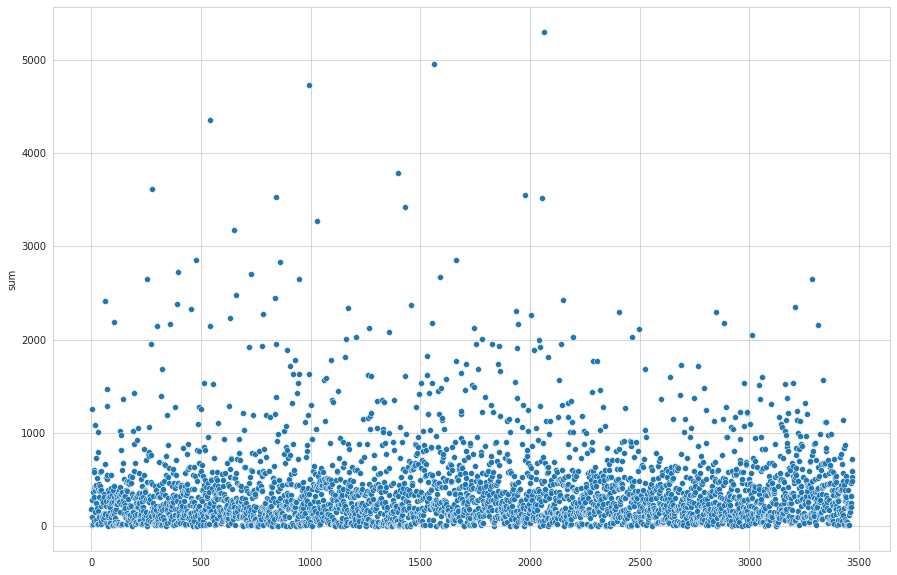

In [83]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x = df.index, y = 'quantity' )
plt.show()
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x = df.index, y = 'sum' );

Мы видим, что есть очень высокие показатели, посчитаем перцентили

In [84]:

df_cnt_perc = int(np.percentile(df['quantity'], [95]))
display('Только 5% чеков содержат кол-во товаров выше чем :', df_cnt_perc, )
# исключим аномальные значения
df = df.query('quantity < @df_cnt_perc')
df

'Только 5% чеков содержат кол-во товаров выше чем :'

480

purchase_id        date loyalty_program  quantity      sum  price_per_one
0     536365      2016-12-01  с картой        33        186.515  6.0200       
1     536366      2016-12-01  с картой        10        19.750   1.9750       
2     536367      2016-12-01  без карты       71        285.395  4.6000       
3     536368      2016-12-01  без карты       11        96.090   10.7900      
4     536369      2016-12-01  без карты       2         13.200   6.6000       
...      ...             ...        ...      ..            ...      ...       
3465  545214      2017-02-28  с картой        89        203.340  2.2700       
3466  545215      2017-02-28  без карты       237       591.025  1.9500       
3467  545216      2017-02-28  без карты       189       523.540  1.9025       
3468  545217      2017-02-28  без карты       189       479.605  2.1125       
3469  545218      2017-02-28  с картой        141       720.415  4.3100       

[3296 rows x 6 columns]

In [85]:
df_sum_perc = int(np.percentile(df['sum'], [95]))
display('Только 5% чеков содержат сумму выше чем :',df_sum_perc)
# исключим аномальные значе_ния
#df_cnt= df_cnt.query('sum> @df_sum_perc').reset_index()
df = df.loc[df['sum'] < df_sum_perc]
df.head()

'Только 5% чеков содержат сумму выше чем :'

849

purchase_id        date loyalty_program  quantity      sum  price_per_one
0  536365      2016-12-01  с картой        33        186.515  6.020        
1  536366      2016-12-01  с картой        10        19.750   1.975        
2  536367      2016-12-01  без карты       71        285.395  4.600        
3  536368      2016-12-01  без карты       11        96.090   10.790       
4  536369      2016-12-01  без карты       2         13.200   6.600

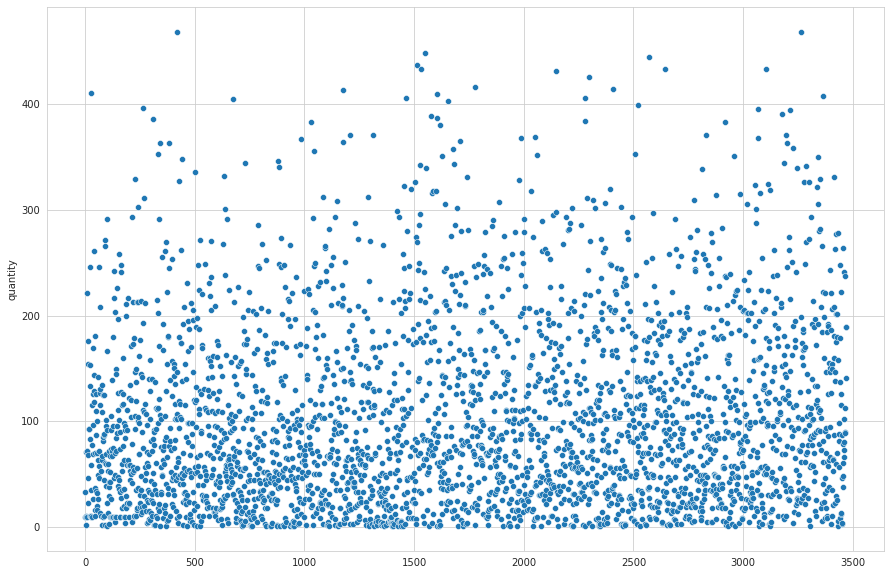

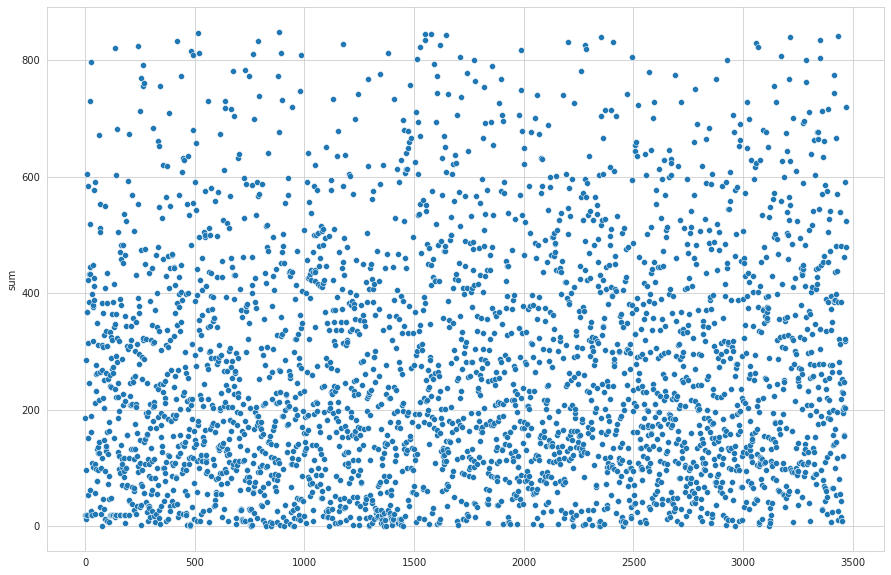

In [86]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x = df.index, y = 'quantity' )
plt.show()
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x = df.index, y = 'sum' );

удалим найденные аномалии из общей таблицы

In [87]:
data = data.query('quantity < @df_cnt_perc')
data = data.loc[data['sum'] < df_sum_perc]
#проверяем
data[data['quantity'] > df_cnt_perc]
data.loc[data['sum'] > df_sum_perc]

Empty DataFrame
Columns: [purchase_id, item_id, quantity, purchase_date, customer_id, shop_id, loyalty_program, date, price_per_one, sum, month]
Index: []

 Провели исследовательский анализ данных:
* Удалили аномалии в показателях кол-ва товара в чеке
* Удалили аномалии в показателях суммы товара в чеке
* Определили, что февраль не может похвастаться высокими продажами
* Удалили нулевые показатели в кол-ве приобретенного товара, ввиду неинформативности данного показателя
* Изучили кол-во возвращаемых товаров(нашли самый возвращаемы продукт 22423 и магазин - Shop 0). Удалили эти товары из дальнейшего исследования 
* Выяснили, что процент возврата составляет 14,54%



## Проведем проверку эффективности программы лояльности

### Соберем таблицу 

In [88]:
data.head()

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
0   538280      21873   11       2016-12-10 12:50:00  18427.0      Shop 0   
2   538855      21239   7        2016-12-14 13:50:00  22182.0      Shop 0   
7   541424      79321   1        2017-01-17 17:57:00  999.0        Shop 0   
10  537795      82494L  5        2016-12-08 13:03:00  22892.0      Shop 0   
11  541696      22197   4        2017-01-20 18:08:00  999.0        Shop 0   

   loyalty_program        date  price_per_one     sum    month  
0   без карты       2016-12-10  1.630          17.930  декабрь  
2   с картой        2016-12-14  1.630          11.410  декабрь  
7   без карты       2017-01-17  5.750          5.750   январь   
10  с картой        2016-12-08  5.205          26.025  декабрь  
11  без карты       2017-01-20  1.240          4.960   январь

In [89]:
data['day'] = pd.to_datetime(data['date']).dt.day
data['week'] = pd.to_datetime(data['date']).dt.week
data['month'] = pd.to_datetime(data['date']).dt.month

In [90]:
da = data.groupby(['date', 'loyalty_program'])\
.agg({'purchase_id':'nunique', 'item_id':'nunique',\
      'shop_id': 'nunique','sum':'sum', 'quantity':'sum',\
      'customer_id': 'nunique', 'price_per_one':'median'}).reset_index()
da.head()

date loyalty_program  purchase_id  item_id  shop_id        sum  \
0  2016-12-01  без карты       66           789      6        25694.495   
1  2016-12-01  с картой        45           299      1        10627.260   
2  2016-12-02  без карты       69           567      3        21837.155   
3  2016-12-02  с картой        57           357      1        14725.155   
4  2016-12-03  без карты       43           642      9        20995.575   

   quantity  customer_id  price_per_one  
0  10025     53           2.5100         
1  3452      34           3.1325         
2  9435      61           2.4800         
3  4961      30           3.1150         
4  7218      28           2.9500

Выделем месяц, день и неделю

In [91]:
da['day'] = pd.to_datetime(da['date']).dt.day
da['week'] = pd.to_datetime(da['date']).dt.week
da['month'] = pd.to_datetime(da['date']).dt.month
def name(month):
    if month == 12:
        return  'декабрь'
    if month == 1:
        return 'январь'
    if month == 2:
        return 'февраль'
da['month'] = da['month'].apply(name) # переименовываем месяца для наглядности в графиках
da.head()

date loyalty_program  purchase_id  item_id  shop_id        sum  \
0  2016-12-01  без карты       66           789      6        25694.495   
1  2016-12-01  с картой        45           299      1        10627.260   
2  2016-12-02  без карты       69           567      3        21837.155   
3  2016-12-02  с картой        57           357      1        14725.155   
4  2016-12-03  без карты       43           642      9        20995.575   

   quantity  customer_id  price_per_one  day  week    month  
0  10025     53           2.5100         1    48    декабрь  
1  3452      34           3.1325         1    48    декабрь  
2  9435      61           2.4800         2    48    декабрь  
3  4961      30           3.1150         2    48    декабрь  
4  7218      28           2.9500         3    48    декабрь

Помним, что за каждую карту лояльности оплачено 200 руб. Прибавим их к общей сумме

In [92]:
da.loc[da['loyalty_program'] == 'с картой', 'sum'] = \
(da.loc[da['loyalty_program']=='с картой','customer_id'] *200)\
+ da.loc[da['loyalty_program'] == 'с картой', 'sum']
da.head()

date loyalty_program  purchase_id  item_id  shop_id        sum  \
0  2016-12-01  без карты       66           789      6        25694.495   
1  2016-12-01  с картой        45           299      1        17427.260   
2  2016-12-02  без карты       69           567      3        21837.155   
3  2016-12-02  с картой        57           357      1        20725.155   
4  2016-12-03  без карты       43           642      9        20995.575   

   quantity  customer_id  price_per_one  day  week    month  
0  10025     53           2.5100         1    48    декабрь  
1  3452      34           3.1325         1    48    декабрь  
2  9435      61           2.4800         2    48    декабрь  
3  4961      30           3.1150         2    48    декабрь  
4  7218      28           2.9500         3    48    декабрь

In [93]:
da['average'] = round(da['sum']/da['customer_id'], 0) # средняя сумма чека на клиента
# среднее кол-во товара на клиента
da['cnt_on_customer'] = round(da['quantity']/da['customer_id'],0)
# среднее кол-во чеков(покупок) на клиента
da['purch_on_customer'] = round(da['purchase_id']/da['customer_id'],0)
da.head()

date loyalty_program  purchase_id  item_id  shop_id        sum  \
0  2016-12-01  без карты       66           789      6        25694.495   
1  2016-12-01  с картой        45           299      1        17427.260   
2  2016-12-02  без карты       69           567      3        21837.155   
3  2016-12-02  с картой        57           357      1        20725.155   
4  2016-12-03  без карты       43           642      9        20995.575   

   quantity  customer_id  price_per_one  day  week    month  average  \
0  10025     53           2.5100         1    48    декабрь  485.0     
1  3452      34           3.1325         1    48    декабрь  513.0     
2  9435      61           2.4800         2    48    декабрь  358.0     
3  4961      30           3.1150         2    48    декабрь  691.0     
4  7218      28           2.9500         3    48    декабрь  750.0     

   cnt_on_customer  purch_on_customer  
0  189.0            1.0                
1  102.0            1.0                
2  155.0            1.0                
3  165.0            2.0                
4  258.0            2.0

### Посмотрим на распределение средних показателей: кол-ва товаров, суммы на клиента по месяцам в зависимости от группы

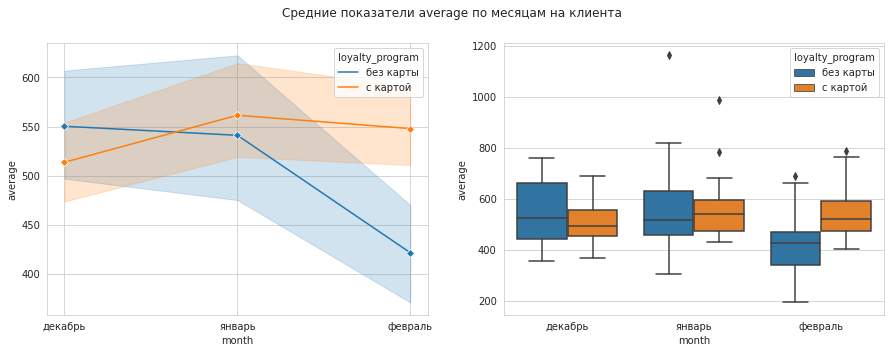

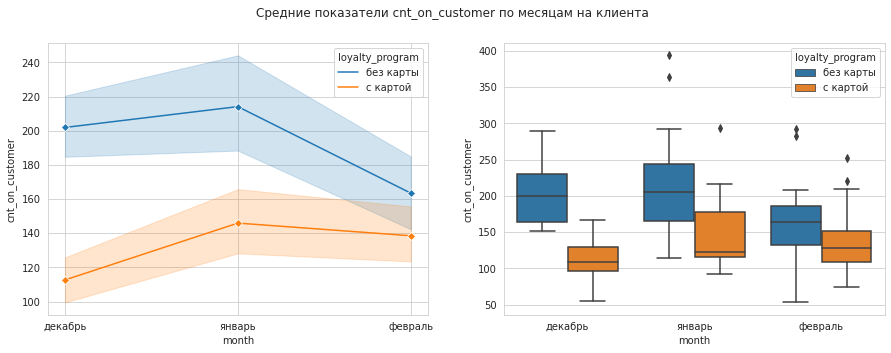

In [94]:
#da_month = da.groupby(['month', 'loyalty_program']).agg({'average':'median', 'cnt_on_customer' :'median'})
#display(da_month)
for item in ['average', 'cnt_on_customer']:
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Средние показатели {item} по месяцам на клиента')
    sns.lineplot(data =da, x = 'month', y = item, hue = 'loyalty_program', marker = 'D', ax=ax[0])
    sns.boxplot(data = da, x = 'month', y = item, hue = 'loyalty_program', ax=ax[1])
    
    plt.show()

Мы видим, что  средняя сумма затрат на клиента с картой лояльности в декабре ниже, чем у второй группы. Но в январе ситуация уже меняется в пользу первой группы. Кол-во покупок выше у группы без карты, но с января кол-во покупок у них падает. А, вот у группы с картой кол-во покупок растет с декабря по январь, а потом стабилизируется.

### Посмотрим на распределение средних показателей: кол-ва товаров, суммы, и чека на клиента по дням в зависимости от группы

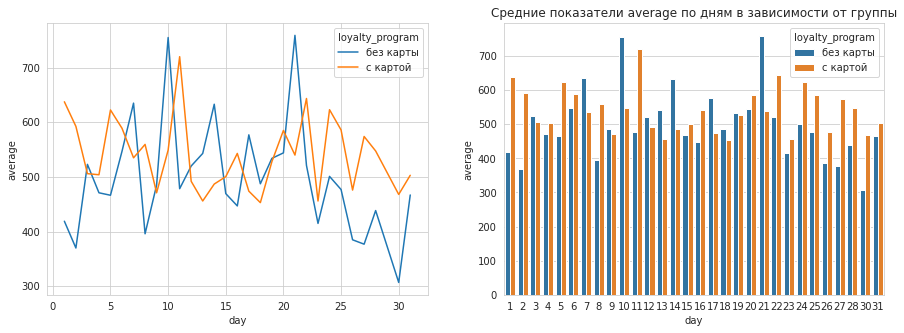

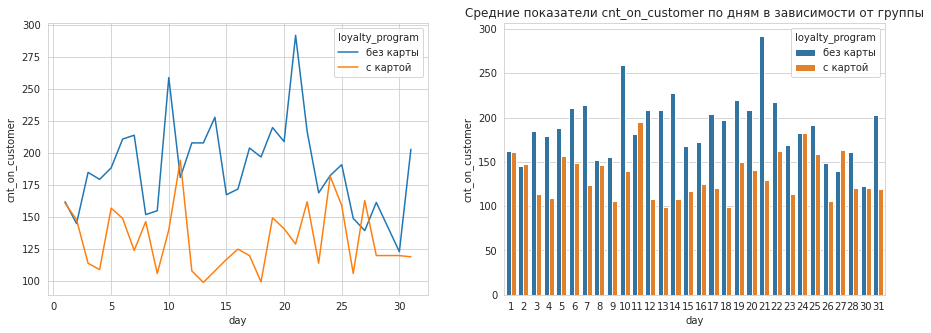

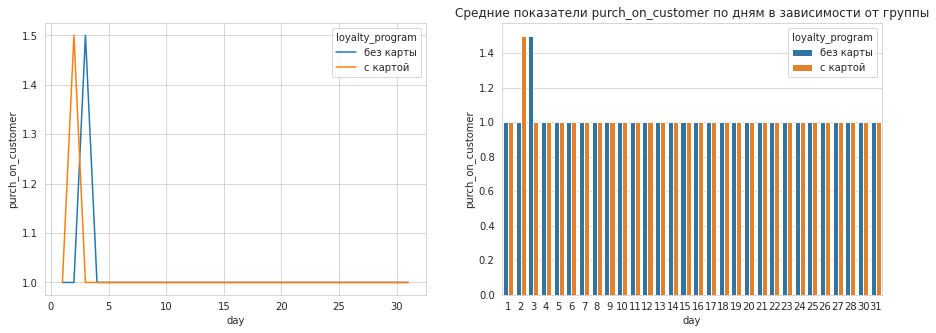

In [95]:
da_day = da.groupby(['day', 'loyalty_program']).agg({'average':'median','cnt_on_customer' :'median',\
                                  'purch_on_customer':'median'}).reset_index()

for item in ['average', 'cnt_on_customer', 'purch_on_customer']:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    plt.title(f'Средние показатели {item} по дням в зависимости от группы')
    sns.lineplot(data =da_day, x = 'day', y = item, hue = 'loyalty_program', ax=ax[0])
    sns.barplot(data = da_day, x = 'day', y = item, hue = 'loyalty_program', ax=ax[1])
    
    plt.show()

Средние показатели кол-ва приобретаемых товаров в группе без карты выше. Среднее кол-во чеков на клиента по дням равно единице. Средняя сумма чека на клиента распределена неравномерно, в феврале сумма чека у клиентов с картой лояльности становится выше чем у второй группы. Посмотрим на кол-во клиентов с картой и без

In [96]:
loyal = data.groupby('loyalty_program')['customer_id'].nunique().reset_index()
display(loyal)
fig = go.Figure(data=[go.Pie(labels=['без карты', 'с картой'], values=loyal['customer_id'])], layout=go.Layout(
        title=go.layout.Title(text="Доля клиентов, участвующих в программе лояльности")))
fig.show()


loyalty_program  customer_id
0  без карты       1066       
1  с картой        542

Клиентов без карты в два раза больше чем с картой

 ### Оценим пользовательскую активность в зависимости от программы по дням, неделям и месяцам

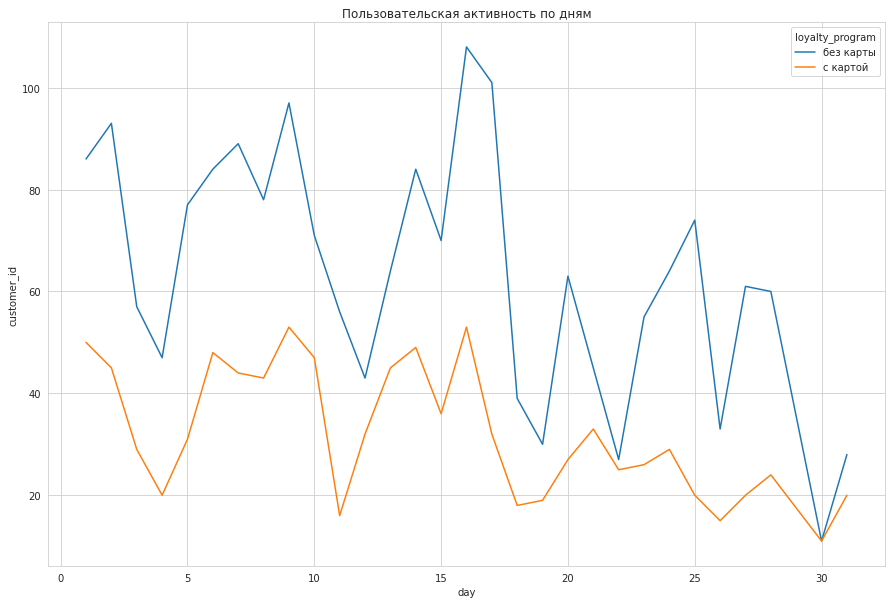

In [97]:
dau_total = data.groupby(['day', 'loyalty_program'])\
.agg({'customer_id': 'nunique'}).reset_index()

wau_total =data.groupby(['week', 'loyalty_program'])\
.agg({'customer_id': 'nunique'}).reset_index()

mau_total = data.groupby(['month', 'loyalty_program'])\
.agg({'customer_id': 'nunique'}).reset_index()


plt.subplots(figsize = (15, 10))
sns.lineplot(data =dau_total, x = 'day', y = 'customer_id', hue = 'loyalty_program')
plt.title('Пользовательская активность по дням')
plt.show()

#plt.subplots(figsize = (15, 10))
#sns.lineplot(data =wau_total, x = 'week', y = 'customer_id', hue = 'loyalty_program')
#plt.title('Пользовательская активность по неделям')
#plt.show()

#plt.subplots(figsize = (15, 10))
#sns.lineplot(data =mau_total, x = 'month', y = 'customer_id', hue = 'loyalty_program')
#plt.title('Пользовательская активность по месяцам')
#plt.show()


Мы видим, что пользовательская активность выше у группы без карты

### Посмотрим на товарную корзину клиентов

In [98]:
da.head()

date loyalty_program  purchase_id  item_id  shop_id        sum  \
0  2016-12-01  без карты       66           789      6        25694.495   
1  2016-12-01  с картой        45           299      1        17427.260   
2  2016-12-02  без карты       69           567      3        21837.155   
3  2016-12-02  с картой        57           357      1        20725.155   
4  2016-12-03  без карты       43           642      9        20995.575   

   quantity  customer_id  price_per_one  day  week    month  average  \
0  10025     53           2.5100         1    48    декабрь  485.0     
1  3452      34           3.1325         1    48    декабрь  513.0     
2  9435      61           2.4800         2    48    декабрь  358.0     
3  4961      30           3.1150         2    48    декабрь  691.0     
4  7218      28           2.9500         3    48    декабрь  750.0     

   cnt_on_customer  purch_on_customer  
0  189.0            1.0                
1  102.0            1.0                
2  155.0            1.0                
3  165.0            2.0                
4  258.0            2.0

In [99]:
activity = data.groupby('loyalty_program')\
.agg({'customer_id':'nunique', 'purchase_id':'nunique', 'item_id': 'count'}).reset_index()

In [100]:
activity= activity.query('customer_id != 999')
# добавим столбец со средним колл-вом товара в чеке на клиента
activity['basket']= round(activity['item_id']/activity['purchase_id'])
activity

loyalty_program  customer_id  purchase_id  item_id  basket
0  без карты       1066         2412         49324    20.0  
1  с картой        542          1058         16373    15.0

In [101]:
data = data.query('customer_id != 999')

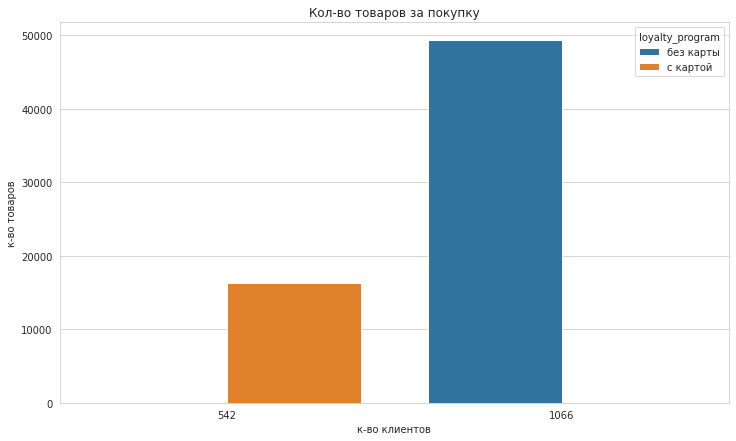

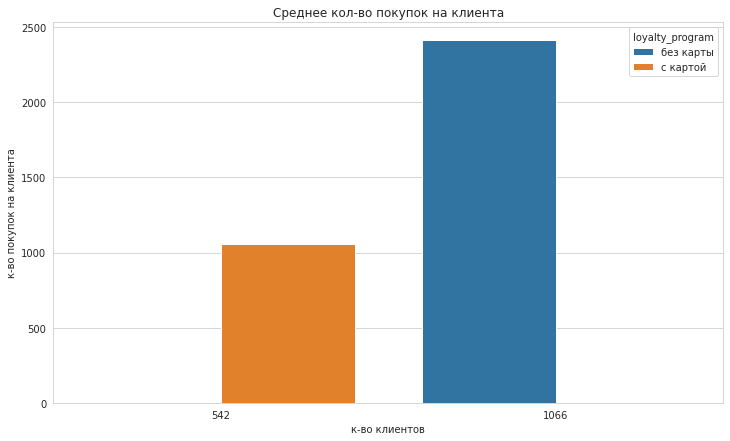

In [102]:
plt.subplots(figsize = (12, 7))
sns.barplot(data = activity, x = 'customer_id', y = 'item_id', hue = 'loyalty_program')
plt.title('Кол-во товаров за покупку')
plt.xlabel('к-во клиентов')
plt.ylabel('к-во товаров')
plt.show();

plt.subplots(figsize = (12, 7))
sns.barplot(data = activity, x = 'customer_id', y = 'purchase_id', hue = 'loyalty_program')
plt.title('Среднее кол-во покупок на клиента')
plt.xlabel('к-во клиентов')
plt.ylabel('к-во покупок на клиента')
plt.show();

Мы видим, что кол-во и товаров в корзине и кол-во покупок в целом выше у группы без карты лояльности. 

### Оценка магазинов

In [103]:
data.head()

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
0   538280      21873   11       2016-12-10 12:50:00  18427.0      Shop 0   
2   538855      21239   7        2016-12-14 13:50:00  22182.0      Shop 0   
10  537795      82494L  5        2016-12-08 13:03:00  22892.0      Shop 0   
12  543647      21987   3        2017-02-10 19:49:00  18520.0      Shop 0   
13  538533      22294   9        2016-12-13 10:31:00  20475.0      Shop 0   

   loyalty_program        date  price_per_one     sum  month  day  week  
0   без карты       2016-12-10  1.630          17.930  12     10   49    
2   с картой        2016-12-14  1.630          11.410  12     14   50    
10  с картой        2016-12-08  5.205          26.025  12     8    49    
12  без карты       2017-02-10  0.650          1.950   2      10   6     
13  без карты       2016-12-13  1.855          16.695  12     13   50

In [104]:
shop = data.groupby(['loyalty_program', 'shop_id']).agg({'quantity':'sum', 'sum':'sum'}).\
reset_index()
shop

loyalty_program  shop_id  quantity         sum
0   без карты       Shop 0   247594    643247.185
1   без карты       Shop 1   15360     39920.260 
2   без карты       Shop 10  2946      8672.135  
3   без карты       Shop 11  1364      4116.965  
4   без карты       Shop 12  2748      5812.880  
5   без карты       Shop 13  570       2204.940  
6   без карты       Shop 14  1837      5009.435  
7   без карты       Shop 15  574       1736.520  
8   без карты       Shop 16  278       664.160   
9   без карты       Shop 17  489       1721.705  
10  без карты       Shop 18  2113      5210.735  
11  без карты       Shop 19  518       1274.115  
12  без карты       Shop 2   2046      6768.940  
13  без карты       Shop 20  364       1020.060  
14  без карты       Shop 21  208       663.230   
15  без карты       Shop 22  431       1003.135  
16  без карты       Shop 24  327       1571.385  
17  без карты       Shop 26  779       2032.120  
18  без карты       Shop 27  309       1440.520  
19  без карты       Shop 29  71        207.715   
20  без карты       Shop 3   4076      11483.460 
21  без карты       Shop 30  331       743.530   
22  без карты       Shop 4   16367     42502.040 
23  без карты       Shop 5   3319      5673.480  
24  без карты       Shop 6   6721      19919.840 
25  без карты       Shop 7   3975      9586.865  
26  без карты       Shop 8   3511      9794.085  
27  без карты       Shop 9   625       1891.195  
28  с картой        Shop 0   128088    332482.950
29  с картой        Shop 19  201       907.300   
30  с картой        Shop 28  323       951.930   
31  с картой        Shop 8   51        239.685

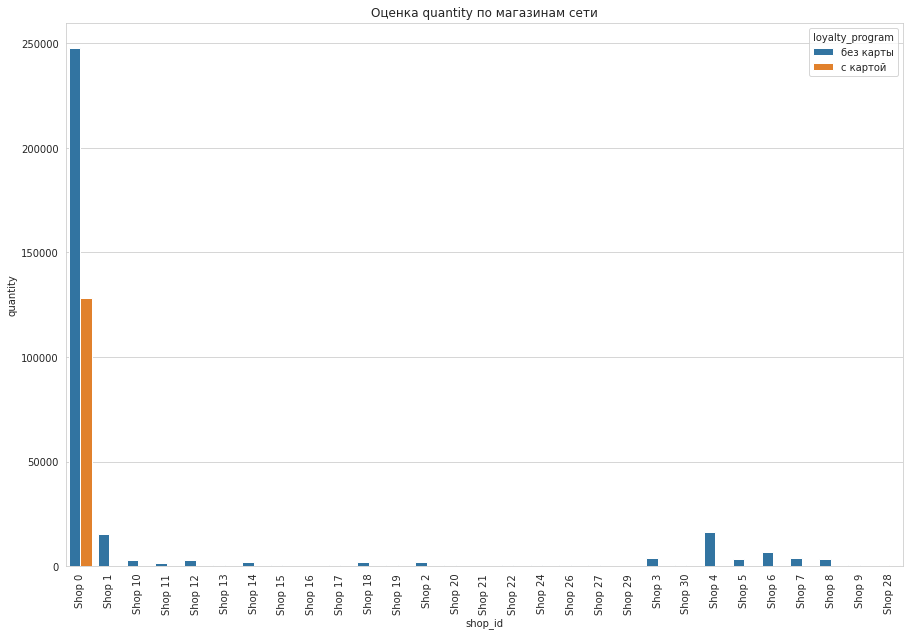

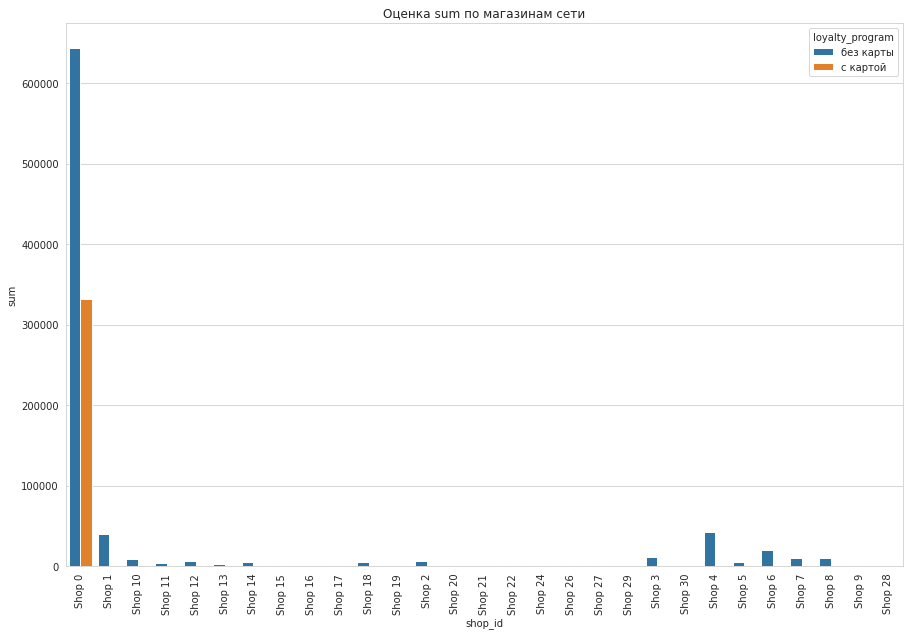

In [105]:
for item in ['quantity', 'sum']:
    plt.subplots(figsize = (15, 10))
    sns.barplot(data =shop, x = 'shop_id', y = item, hue = 'loyalty_program')
    plt.title(f'Оценка {item} по магазинам сети')
    plt.xticks(rotation = 90)
    plt.show()
    

У нас тут ничего не видно из- за высоких показателей Shop 0, посмотрим без него

In [106]:
shop_not0 = shop.query('shop_id != "Shop 0"').sort_values(by = 'quantity', ascending = False)
shop_not0

loyalty_program  shop_id  quantity        sum
22  без карты       Shop 4   16367     42502.040
1   без карты       Shop 1   15360     39920.260
24  без карты       Shop 6   6721      19919.840
20  без карты       Shop 3   4076      11483.460
25  без карты       Shop 7   3975      9586.865 
26  без карты       Shop 8   3511      9794.085 
23  без карты       Shop 5   3319      5673.480 
2   без карты       Shop 10  2946      8672.135 
4   без карты       Shop 12  2748      5812.880 
10  без карты       Shop 18  2113      5210.735 
12  без карты       Shop 2   2046      6768.940 
6   без карты       Shop 14  1837      5009.435 
3   без карты       Shop 11  1364      4116.965 
17  без карты       Shop 26  779       2032.120 
27  без карты       Shop 9   625       1891.195 
7   без карты       Shop 15  574       1736.520 
5   без карты       Shop 13  570       2204.940 
11  без карты       Shop 19  518       1274.115 
9   без карты       Shop 17  489       1721.705 
15  без карты       Shop 22  431       1003.135 
13  без карты       Shop 20  364       1020.060 
21  без карты       Shop 30  331       743.530  
16  без карты       Shop 24  327       1571.385 
30  с картой        Shop 28  323       951.930  
18  без карты       Shop 27  309       1440.520 
8   без карты       Shop 16  278       664.160  
14  без карты       Shop 21  208       663.230  
29  с картой        Shop 19  201       907.300  
19  без карты       Shop 29  71        207.715  
31  с картой        Shop 8   51        239.685

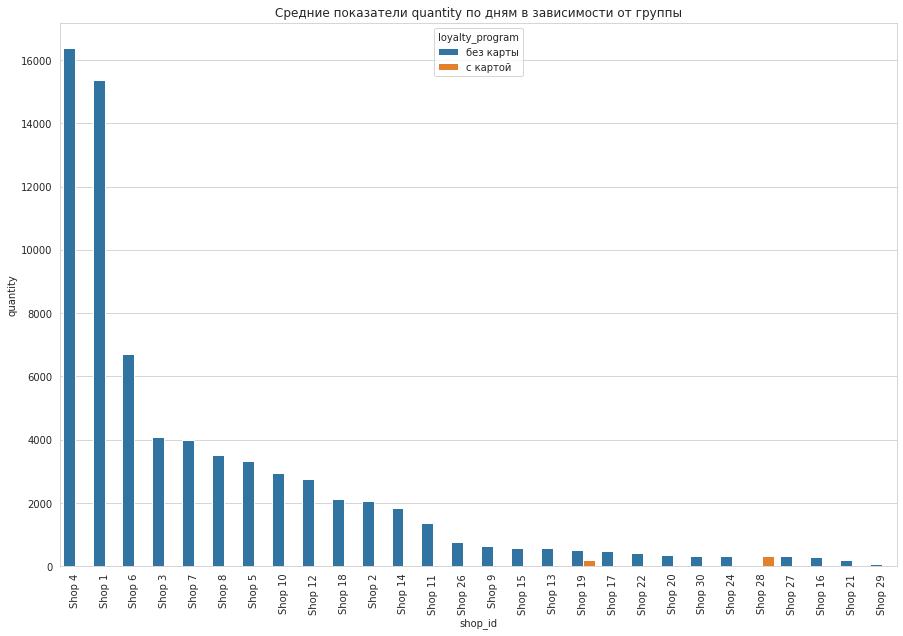

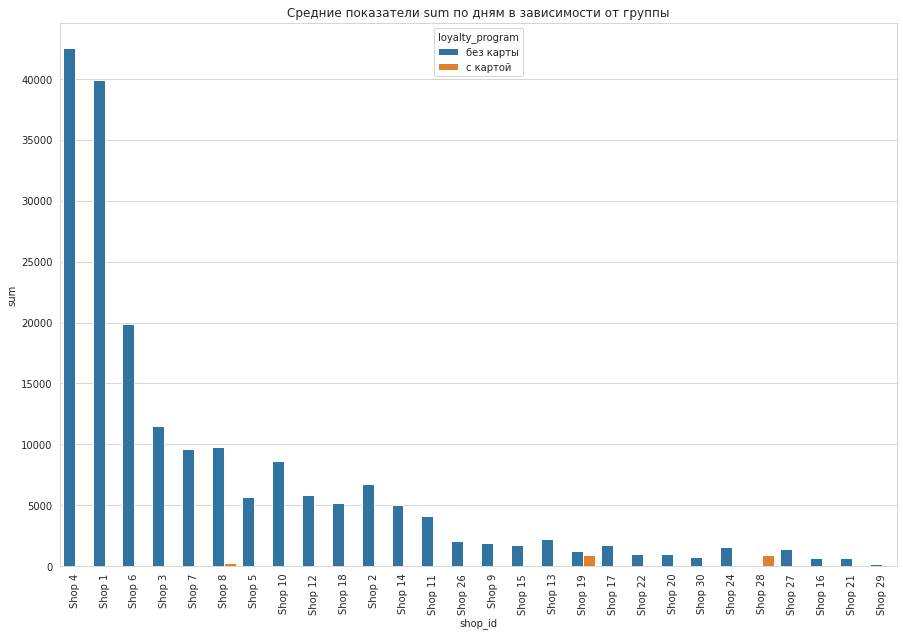

In [107]:
for item in ['quantity', 'sum']:
    plt.subplots(figsize = (15, 10))
    sns.barplot(data =shop_not0, x = 'shop_id', y = item, hue = 'loyalty_program')
    plt.title(f'Средние показатели {item} по дням в зависимости от группы')
    plt.xticks(rotation = 90)
    plt.show()

Можно сделать вывод, что картой лояльности пользуются только в четырех магазинах сети. При этом какие-то существенные результаты наблюдаются только в shop 0. А, также следует отметить, что даже в shop 0 доход и кол-во купленных товаров выше от клиентов без карты лояльности

Так же мы можем выделить в принципе лидеров продаж по магазинам это : Shop 0, Shop 4, Shop 1, Shop 3. Бесспорное преимущество за Shop 0. Видимо это как и предполагалось выше оптовая база или очень большой дисконт центр. Либо просто самы крупный магазин сети.

Что мы выяснили при проверке эффективности программы лояльности:

  * Распределение средних показателей прихода sum на клиента в группе с картой лояльности повышается с декабря по февраль относительно группы без карты. Можно наблюдать, что суммы которые тратят клиенты с картой лояльности становятся постепенно выше, чем у второй группы
  * Распределение средних показателей к-ва приобретенных товаров на клиента в группе с картой лояльности в принципе ниже чем у группы без карты
  * В день на каждого клиента приходится примерно один чек и в той и в другой группе
  * Доля клиентов без карты 66,5 %, с картой лояльности 33,5%
  * Пользовательская активность выше у группы без карты лояльности
  * Картой лояльности пользуются только в четырех магазинах сети, и только в одном магазине Shop 0 ею пользуются достаточно активно. При этом продажи в Shop O выше по клиентам без карты

## Проверка статистических гипотез:


### Гипотеза 1

Объявим гипотезы:

H0 : Средние чеки участников программы лояльности и у остальных клиентов равны.

H1 : Средние чеки участников программы лояльности и у остальных клиентов разные.

In [108]:
mid_check = data.groupby(['loyalty_program', 'purchase_id'])['sum'].sum().reset_index()
mid_check_1 = mid_check[mid_check['loyalty_program'] == 'с картой']
mid_check_2 = mid_check[mid_check['loyalty_program'] == 'без карты']
display(mid_check_1, mid_check_2)

loyalty_program purchase_id      sum
2068  с картой        536365      186.515
2069  с картой        536366      19.750 
2070  с картой        536372      19.750 
2071  с картой        536373      367.365
2072  с картой        536375      367.365
...        ...           ...          ...
3121  с картой        545186      156.470
3122  с картой        545187      155.165
3123  с картой        545213      321.290
3124  с картой        545214      203.340
3125  с картой        545218      720.415

[1058 rows x 3 columns]

loyalty_program purchase_id       sum
0     без карты       536367      285.395 
1     без карты       536368      96.090  
2     без карты       536369      13.200  
3     без карты       536370      1261.270
4     без карты       536378      604.220 
...         ...          ...          ... 
2063  без карты       545183      228.075 
2064  без карты       545184      205.655 
2065  без карты       545188      463.015 
2066  без карты       545190      247.445 
2067  без карты       545191      318.235 

[2068 rows x 3 columns]

<font color='purple'><b> Т.к. размеры выборок не совпадают, выборки независимы м.у собой и мы уже использовали данные без аномалий, будем проводить сравнение с пощью t -теста Стьюдента с equal_var = False. </b></font><br>

In [109]:
sample_1 = mid_check_1['sum']
sample_2 = mid_check_2['sum']
alpha = 0.05 # уровень статистической значимости
# # выборки не равны, используем equal_var

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 9.372894135019865e-11
Отвергаем нулевую гипотезу


Собственно это подтверждает сделанные нами ранее выводы. Средний чек в группах разный

### Гипотеза 2

Объявим гипотезы:

H0 : Среднее кол-во приобретенных товаров у пользователей программы лояльности и у остальных клиентов равны.

H1 : Среднее кол-во приобретенных товаров у пользователей программы лояльности и у остальных клиентов разные.


In [110]:
mid_item = data.groupby(['loyalty_program', 'purchase_id'])['quantity'].sum().reset_index()
mid_item_1 = mid_item[mid_item['loyalty_program'] == 'с картой']
mid_item_2 = mid_item[mid_item['loyalty_program'] == 'без карты']
display(mid_item_1, mid_item_2)

loyalty_program purchase_id  quantity
2068  с картой        536365      33      
2069  с картой        536366      10      
2070  с картой        536372      10      
2071  с картой        536373      72      
2072  с картой        536375      72      
...        ...           ...      ..      
3121  с картой        545186      66      
3122  с картой        545187      80      
3123  с картой        545213      113     
3124  с картой        545214      89      
3125  с картой        545218      141     

[1058 rows x 3 columns]

loyalty_program purchase_id  quantity
0     без карты       536367      71      
1     без карты       536368      11      
2     без карты       536369      2       
3     без карты       536370      429     
4     без карты       536378      221     
...         ...          ...      ...     
2063  без карты       545183      79      
2064  без карты       545184      102     
2065  без карты       545188      241     
2066  без карты       545190      73      
2067  без карты       545191      90      

[2068 rows x 3 columns]

In [111]:
sample_1 = mid_item_1['quantity']
sample_2 = mid_item_2['quantity']
alpha = 0.05 # уровень статистической значимости
# выборки не равны, используем equal_var

results = st.ttest_ind(sample_1, sample_2, equal_var = False)



print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.094084240767083e-09
Отвергаем нулевую гипотезу


Кол-во приобретаемых товаров у двух исследуемых нами групп разное

## Вывод

* Мы выяснили, что у нас данные с начала декабря 2016 года по конец февраля 2017
* Картой лояльности пользуются только 1/3 часть клиентов сети и в основном только в одном магазине shop 0
* С конца декабря по начало января в магазине не было продаж(скорее всего магазин был закрыт)
* Кол-во приобретаемых товаров выше у клиентов без карты
* Сумма среднего чека выше у клиентов с картой лояльности
* Большую активность проявляют  клиенты без карты
* Наиболее продаваемый магазин Shop 0
* Клиенты с картой лояльности редко возвращают товары
* Карта лояльности не показала каких-то значимых результатов

Рекомендации:
 * Данные собирались в период Новогодних праздников. Не самый лучший период, ввиду большой активности клиентов в декабре и низкой в январе. Вряд ли показатели являются действительно правильно информативными. Продолжать собирать данные
 * Изучить почему Shop 0 является настолько более продаваемым магазинам. Возможно передать опыт другим магазинам сети
 * Более активно предлагать карты лояльности в остальных магазинах сети. Может устроить акцию по картам.
 * И хотя результаты по внедрению карты лояльности отрицательные, все же предлагаю попробовать продолжить ее внедрять. Т.к. средняя сумма с продаж и маленькое кол-во возвратов вселяет некий оптимизм. А люди перед праздниками находятся в состоянии ажиотажа и не вникают в новые предложения.  
 
